### Segmentation of Mammographic Mass 

##  Code 2

### Importing the Libraries 

2024-08-06 09:59:19.354278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 09:59:20.300887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Benign Images


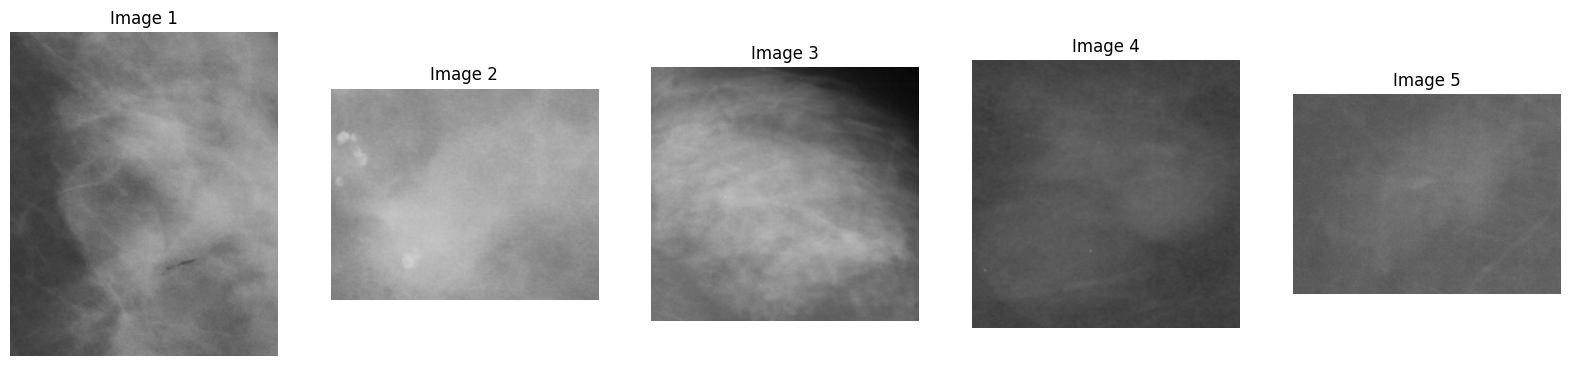

Malignant Images


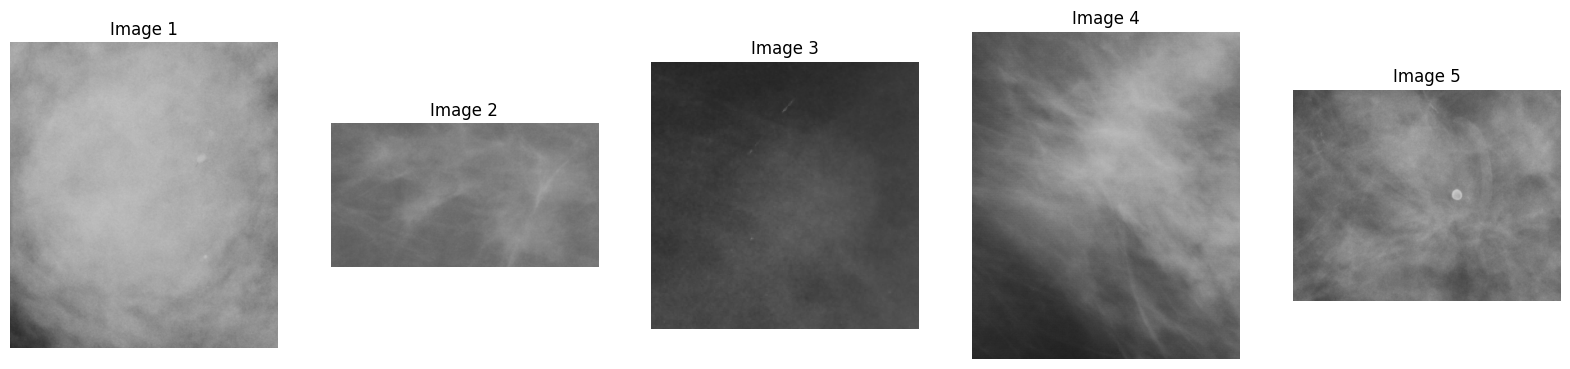

2024-08-06 09:59:41.884965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 09:59:41.921496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 09:59:41.921751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/50


2024-08-06 09:59:44.061577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-08-06 09:59:48.254052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2024-08-06 09:59:50.126185: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5645a21f4260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-06 09:59:50.126222: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-08-06 09:59:50.131961: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-06 09:59:50.297263

171/171 [==============================] - ETA: 0s - loss: 0.6800

2024-08-06 10:00:21.895374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


171/171 [==============================] - 39s 153ms/step - loss: 0.6800 - val_loss: 0.6475 - lr: 1.0000e-04
Epoch 2/50
171/171 [==============================] - 21s 120ms/step - loss: 0.6504 - val_loss: 0.6481 - lr: 1.0000e-04
Epoch 3/50
171/171 [==============================] - 21s 121ms/step - loss: 0.6499 - val_loss: 0.6468 - lr: 1.0000e-04
Epoch 4/50
171/171 [==============================] - 21s 121ms/step - loss: 0.6478 - val_loss: 0.6415 - lr: 1.0000e-04
Epoch 5/50
171/171 [==============================] - 21s 121ms/step - loss: 0.6471 - val_loss: 0.6462 - lr: 1.0000e-04
Epoch 6/50
171/171 [==============================] - 21s 121ms/step - loss: 0.6465 - val_loss: 0.6449 - lr: 1.0000e-04
Epoch 7/50
171/171 [==============================] - 21s 122ms/step - loss: 0.6474 - val_loss: 0.6413 - lr: 1.0000e-04
Epoch 8/50
171/171 [==============================] - 21s 121ms/step - loss: 0.6458 - val_loss: 0.6416 - lr: 1.0000e-04
Epoch 9/50
171/171 [==============================]

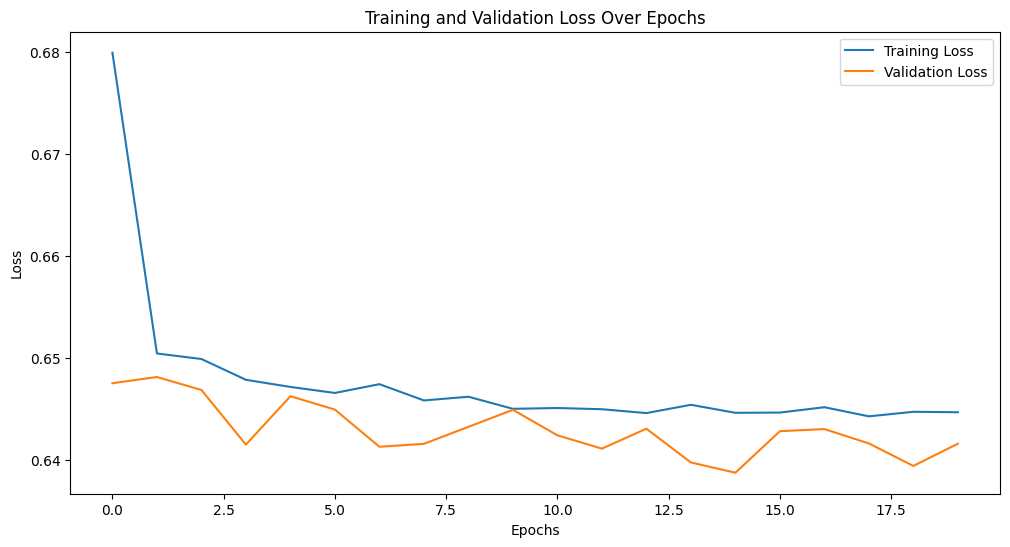

1/1 [==============================] - 2s 2s/step


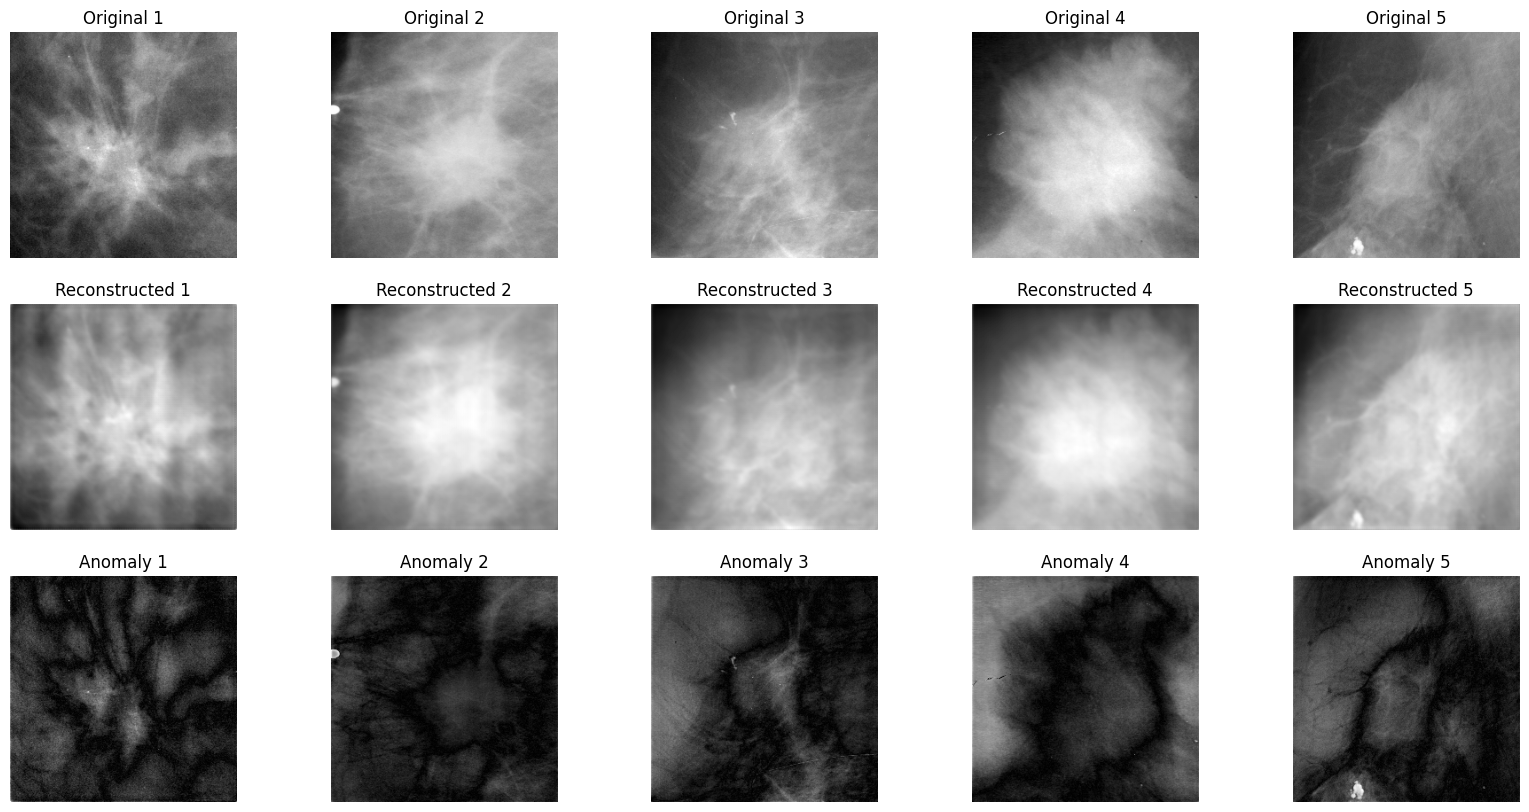

In [1]:
"""
This block imports essential libraries required for the project. 
The os module helps in managing file paths. cv2 (OpenCV) is used for image processing tasks. 
numpy is a library for numerical computations. matplotlib.pyplot is used for plotting and visualizing images. 
TensorFlow and Keras libraries are used for building and training deep learning models, 
specifically a U-Net model for image segmentation in this context.
"""
import os # Module for interacting with the operating system, used here to manage file paths
import cv2 #  OpenCV library for image processing
import numpy as np # Library for numerical computations
import matplotlib.pyplot as plt # Library for plotting graphs and displaying images.
import tensorflow as tf # Framework for building and training machine learning models.
from tensorflow.keras import layers, models, regularizers # High-level API for building neural networks in TensorFlow.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Class for generating batches of tensor image data with real-time data augmentation.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau #Callbacks to stop training when a monitored metric has stopped improving and to reduce the learning rate when a metric has stopped improving, respectively


# Define paths to dataset directories
"""
This section defines the paths to the dataset directories. 
base_dir is the root directory for the dataset. 
train_dir, validation_dir, and test_dir are the paths to the training, validation, and test datasets, respectively. 
These paths are constructed using os.path.join for compatibility across different operating systems.
"""
base_dir = '/home/ubuntu/BCS/Breast_Cancer_Segmentation/Dataset' # Adjust the path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Function to load and display images using cv2
"""
This function loads and displays images from a specified folder using OpenCV (cv2) and matplotlib (plt). 
It reads images from the folder, converts them from BGR to RGB color space (since OpenCV reads images in BGR by default), and stores them in a list. 
It then uses matplotlib to display the specified number of images (num_images) in a single row.
"""

def load_and_display_images(folder_path, num_images=5):
    images = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                #Reads an image from a file.
                img = cv2.imread(img_path)
                # Converts an image from one color space to another
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                images.append(img)
                if len(images) >= num_images:
                    break
        if len(images) >= num_images:
            break
    
    # Display images
    plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        # Displays an image
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

# Visualize Benign and Malignant Images from Training Set
"""
This section calls the load_and_display_images function to visualize benign and malignant images from the training set. 
It first defines the paths to the benign and malignant folders within the training directory. 
Then, it prints and displays the images from each folder using the previously defined function.
"""
benign_folder = os.path.join(train_dir, 'benign')
malignant_folder = os.path.join(train_dir, 'malignant')

print("Benign Images")
load_and_display_images(benign_folder)

print("Malignant Images")
load_and_display_images(malignant_folder)

# Define the U-Net model with increased complexity
"""
This function defines a U-Net model with increased complexity for image segmentation tasks. 
The U-Net architecture consists of an encoding path (contracting path) and a decoding path (expanding path). 
The encoding path is composed of several convolutional layers with max-pooling, which reduces the spatial dimensions while increasing the feature representation. 
The decoding path consists of transpose convolutional layers that increase the spatial dimensions, effectively reconstructing the input image. 
Skip connections are used to concatenate features from the encoding path to the corresponding layers in the decoding path, providing high-resolution features for reconstruction. 
The final output layer uses a sigmoid activation function to predict pixel-wise binary classification.
"""
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoding path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Function to preprocess images
"""
This function preprocesses images by converting them to grayscale, resizing them to 256x256 pixels, 
adding a channel axis, and normalizing the pixel values to the range [0, 1].
This preprocessing is essential for preparing the images for training the deep learning model.
"""
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    image = cv2.resize(image, (256, 256))  # Resize the image to 256x256
    image = np.expand_dims(image, axis=-1)  # Expand dimensions to add channel axis
    image = image / 255.0  # Normalize the image
    return image

# Function to load images from a folder
"""
This function loads and preprocesses images from a specified folder. 
It reads the images using OpenCV, applies the preprocess_image function, and stores the processed images in a list. 
The function can load a specified number of images (num_images) or all images in the folder if num_images is not specified.
"""
def load_images_from_folder(folder, num_images=None):
    images = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path)
                img = preprocess_image(img)
                images.append(img)
                if num_images and len(images) >= num_images:
                    break
        if num_images and len(images) >= num_images:
            break
    return np.array(images)

# Load and preprocess images
"""
This code loads and preprocesses images from the training and validation directories using the load_images_from_folder function
"""
train_images = load_images_from_folder(train_dir)
validation_images = load_images_from_folder(validation_dir)

# Data augmentation
"""
Data augmentation is used to artificially increase the diversity of the training dataset by applying random transformations to the images. 
This code defines a dictionary of augmentation parameters, including rotation, width and height shifts, shearing, zooming, and horizontal flipping. 
These transformations help the model generalize better by exposing it to varied versions of the training images. 
The ImageDataGenerator class from Keras is used to generate batches of augmented images in real-time during training.
"""
data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)

# Define and compiling the U-Net model
""""
This code defines and compiles the U-Net model using the Adam optimizer with a learning rate of 0.0001. 
The loss function used is binary cross-entropy, and the performance metric is accuracy. 
Compiling the model prepares it for training.
"""
model = unet_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
"""
This section trains the U-Net model using the augmented training and validation data. 
The flow method of ImageDataGenerator creates generators that yield batches of augmented images. 
The fit method trains the model for a specified number of epochs (50 in this case). 
Early stopping and learning rate reduction callbacks are used to monitor the validation loss and adjust the training process accordingly.
"""
autoencoder = unet_model()
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy')

train_generator = image_datagen.flow(train_images, train_images, batch_size=8)
validation_generator = image_datagen.flow(validation_images, validation_images, batch_size=8)

history = autoencoder.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    steps_per_epoch=len(train_images) // 8,
    validation_steps=len(validation_images) // 8,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)]
)

# Save the trained model
autoencoder.save('Main_breast_cancer_autoencoder_2.h5')

# Function to visualize training history
"""
This function visualizes the training history by plotting the training and validation loss over epochs. 
It uses matplotlib to create a line plot that helps in understanding the model's performance during training and validation.
"""
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

# Function to visualize anomalies
"""
This function visualizes anomalies by comparing the original input images with the reconstructed images produced by the autoencoder. 
It calculates the absolute difference between the original and reconstructed images to highlight anomalies. 
The original, reconstructed, and anomaly images are displayed using matplotlib.
"""
def visualize_anomalies(input_images, model, num_images=5):
    reconstructed_images = model.predict(input_images[:num_images])

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        original = input_images[i]
        reconstructed = reconstructed_images[i]

        anomaly = np.abs(original - reconstructed)
        anomaly = np.squeeze(anomaly)  # Remove single channel dimension

        plt.subplot(3, num_images, i+1)
        plt.imshow(np.squeeze(original), cmap='gray')
        plt.title(f"Original {i+1}")
        plt.axis('off')

        plt.subplot(3, num_images, i+num_images+1)
        plt.imshow(np.squeeze(reconstructed), cmap='gray')
        plt.title(f"Reconstructed {i+1}")
        plt.axis('off')

        plt.subplot(3, num_images, i+2*num_images+1)
        plt.imshow(anomaly, cmap='gray')
        plt.title(f"Anomaly {i+1}")
        plt.axis('off')

    plt.show()

# Visualize anomalies in validation images

"""
This code calls the visualize_anomalies function to visualize anomalies in the validation images using the trained autoencoder model. 
It helps in understanding how well the model can detect anomalies in the validation dataset.
"""
visualize_anomalies(validation_images, autoencoder)



###  Concerning the Traning and Validations Loss over Epochs Visuallization 

The plot shown is a visualization of the training and validation loss over epochs for the U-Net model used in the breast cancer segmentation task. The x-axis represents the number of epochs, while the y-axis represents the loss values. There are two lines in the plot:

Training Loss (blue line): This line shows how the loss on the training dataset decreases as the number of epochs increases. Initially, there is a steep drop in the training loss, indicating that the model is learning and improving its performance on the training data quickly. After this sharp decrease, the training loss continues to decrease gradually and stabilizes, indicating that the model is converging.

Validation Loss (orange line): This line shows the loss on the validation dataset over the epochs. Unlike the training loss, the validation loss does not exhibit a smooth, continuous decrease. Instead, it fluctuates, indicating variability in the model's performance on the validation data. Despite these fluctuations, the overall trend of the validation loss is downward, suggesting that the model is improving its ability to generalize to unseen data.

#### Key Points
- Initial Decrease in Loss: Both the training and validation losses decrease significantly at the beginning of the training process, indicating that the model is learning effectively from the data.
- Fluctuations in Validation Loss: The validation loss shows more variability compared to the training loss, which is common as the validation dataset may contain more diverse examples that can cause the model's performance to vary.
- Convergence: The training loss starts to stabilize, indicating that the model is reaching a point where further training does not significantly improve its performance on the training data.
- Gap Between Training and Validation Loss: The gap between the training and validation loss is relatively small, suggesting that the model is not significantly overfitting to the training data. Overfitting would be indicated by a much lower training loss compared to the validation loss.

### Explanation of the Generated Result 
##### Original Images:
- This row shows the original input images provided to the U-Net model for anomaly detection. These grayscale images represent the mammograms where the model needs to identify potential cancerous tissues.
- Each image is labeled as "Original 1", "Original 2", and "Original 3", showing three different samples from the dataset.
###### Reconstructed Images:
- This row displays the reconstructed images generated by the U-Net model. The purpose of reconstruction is to produce images that closely resemble the original inputs but are free of anomalies.
- Each reconstructed image corresponds to its original counterpart (i.e., "Reconstructed 1" for "Original 1", and so on). The reconstruction aims to capture the normal structures of the tissue, allowing the model to highlight the differences as anomalies.
###### Anomaly Images:
- This row highlights the detected anomalies. These images represent the absolute difference between the original and reconstructed images, effectively showing areas where the reconstruction deviates significantly from the original.
- Anomalies are expected to appear as bright spots or regions in these difference images, indicating potential areas of concern that the model identifies as anomalous tissue.
- Each anomaly image is labeled to correspond with the original and reconstructed images (i.e., "Anomaly 1" for "Original 1" and "Reconstructed 1", and so on).
### Interpretation:
<<< The image grid provides a clear visual representation of how the U-Net model processes and identifies anomalies in medical images. The top row shows the original mammograms, which contain both normal and potentially cancerous tissues. The middle row shows how the model attempts to reconstruct these images, ideally focusing on normal tissue structures. The bottom row highlights the discrepancies between the original and reconstructed images, pinpointing areas where the model detects significant differences, which are interpreted as anomalies. >>>

#### Key Observations:
- Accuracy of Reconstruction: The reconstructed images in the middle row closely resemble the original images, indicating that the model is effective in capturing the overall structure of the tissue.
- Highlighting Anomalies: The anomaly images clearly show regions that differ from the reconstructed images, highlighting potential cancerous tissues. These bright spots or regions in the anomaly images are where the model has identified significant deviations from normal tissue, which could warrant further medical investigation.
This visualization is crucial in medical imaging as it helps radiologists and medical professionals quickly identify and focus on areas of concern, thereby aiding in the early detection and diagnosis of breast cancer.

## Trying to improve the model 3

following the same steps 

2024-08-06 10:28:26.780666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 10:28:27.771616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Benign Images


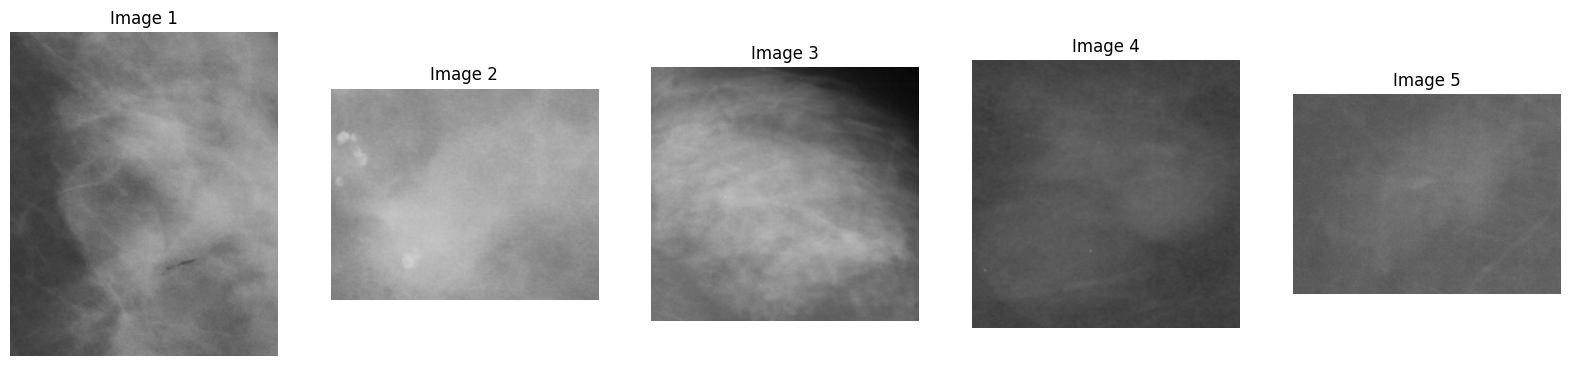

Malignant Images


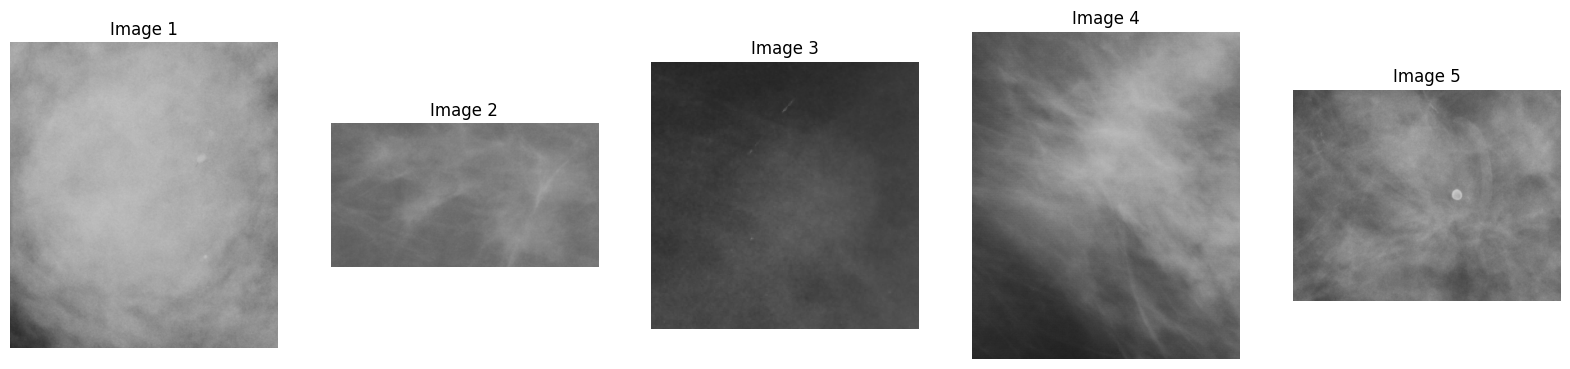

2024-08-06 10:28:49.489673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 10:28:49.526683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 10:28:49.526948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2024-08-06 10:28:51.744650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-08-06 10:28:55.087403: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-06 10:28:56.266963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2024-08-06 10:29:00.792231: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55c51797ad50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-06 10:29:00.792275: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor dev

85/85 [==============================] - ETA: 0s - loss: 0.6814

2024-08-06 10:29:37.715084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


85/85 [==============================] - 48s 332ms/step - loss: 0.6814 - val_loss: 0.6613 - lr: 1.0000e-04
Epoch 2/100
85/85 [==============================] - 22s 255ms/step - loss: 0.6545 - val_loss: 0.6509 - lr: 1.0000e-04
Epoch 3/100
85/85 [==============================] - 22s 254ms/step - loss: 0.6513 - val_loss: 0.6537 - lr: 1.0000e-04
Epoch 4/100
85/85 [==============================] - 22s 254ms/step - loss: 0.6491 - val_loss: 0.6547 - lr: 1.0000e-04
Epoch 5/100
85/85 [==============================] - 22s 255ms/step - loss: 0.6493 - val_loss: 0.6473 - lr: 1.0000e-04
Epoch 6/100
85/85 [==============================] - 22s 255ms/step - loss: 0.6486 - val_loss: 0.6448 - lr: 1.0000e-04
Epoch 7/100
85/85 [==============================] - 22s 253ms/step - loss: 0.6477 - val_loss: 0.6457 - lr: 1.0000e-04
Epoch 8/100
85/85 [==============================] - 22s 254ms/step - loss: 0.6476 - val_loss: 0.6536 - lr: 1.0000e-04
Epoch 9/100
85/85 [==============================] - 22s 254

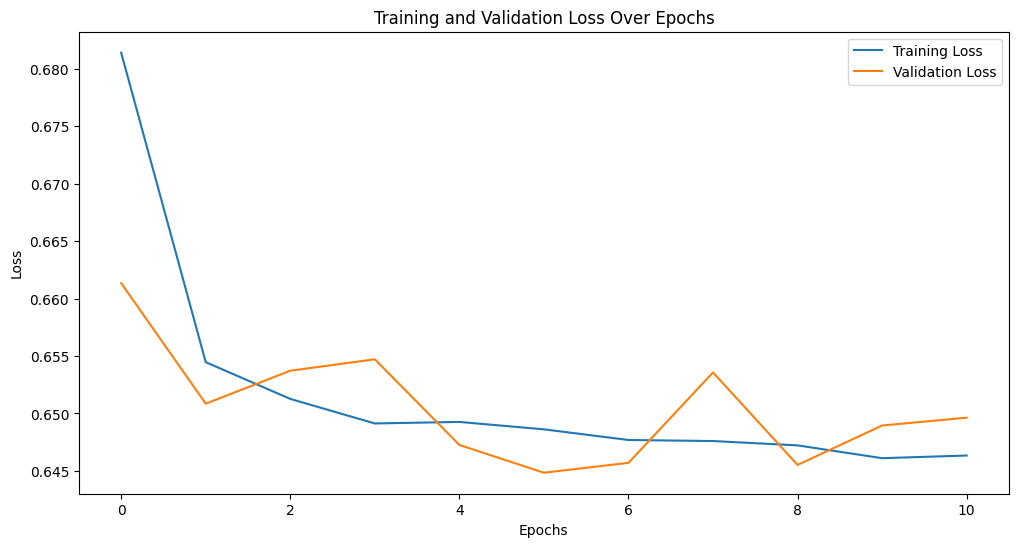

1/1 [==============================] - 2s 2s/step


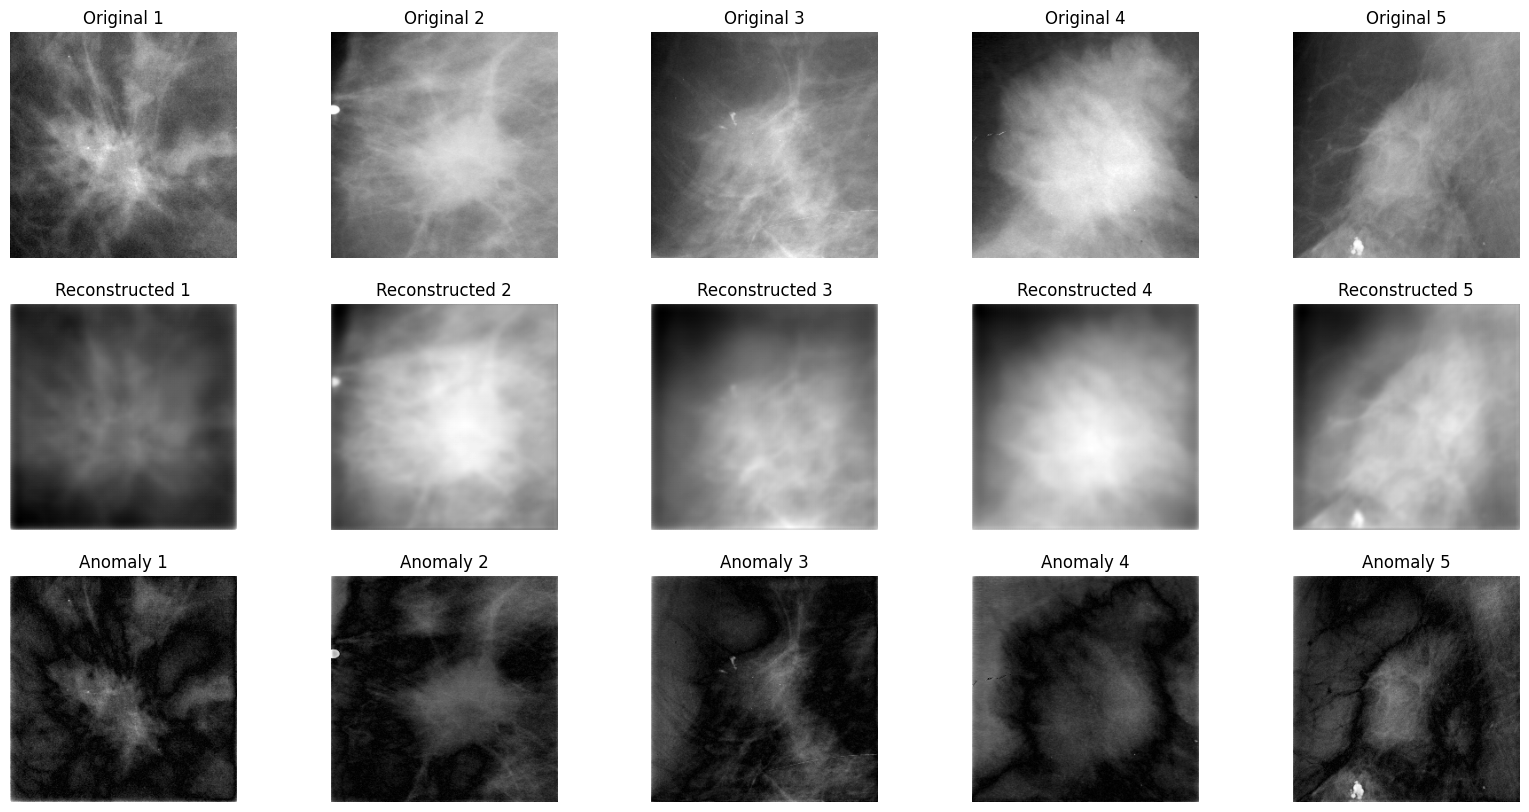

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths
base_dir = '/home/ubuntu/BCS/Breast_Cancer_Segmentation/Dataset' ### change path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Function to load and display images using cv2
def load_and_display_images(folder_path, num_images=5):
    images = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                images.append(img)
                if len(images) >= num_images:
                    break
        if len(images) >= num_images:
            break
    
    # Display images
    plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

# Visualize Benign and Malignant Images from Training Set
benign_folder = os.path.join(train_dir, 'benign')
malignant_folder = os.path.join(train_dir, 'malignant')

print("Benign Images")
load_and_display_images(benign_folder)

print("Malignant Images")
load_and_display_images(malignant_folder)

# Define the U-Net model with increased complexity and dropout for regularization
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoding path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    p1 = layers.Dropout(0.1)(p1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    p2 = layers.Dropout(0.1)(p2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    p3 = layers.Dropout(0.2)(p3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    p4 = layers.Dropout(0.2)(p4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = layers.Dropout(0.3)(c5)

    # Decoding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Function to preprocess images
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (256, 256))
    image = np.expand_dims(image, axis=-1)
    image = image / 255.0  # Normalize
    return image

# Function to load images from a folder
def load_images_from_folder(folder, num_images=None):
    images = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path)
                img = preprocess_image(img)
                images.append(img)
                if num_images and len(images) >= num_images:
                    break
        if num_images and len(images) >= num_images:
            break
    return np.array(images)

# Load and preprocess images
train_images = load_images_from_folder(train_dir)
validation_images = load_images_from_folder(validation_dir)

# Data augmentation
data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)

# Define and compile the U-Net model
model = unet_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
autoencoder = unet_model()
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy')

train_generator = image_datagen.flow(train_images, train_images, batch_size=16)
validation_generator = image_datagen.flow(validation_images, validation_images, batch_size=16)

history = autoencoder.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    steps_per_epoch=len(train_images) // 16,
    validation_steps=len(validation_images) // 16,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)] # adjusted for better performance 
)

autoencoder.save('Main_breast_cancer_autoencoder_3.h5')

# Function to visualize training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

# Function to visualize anomalies
def visualize_anomalies(input_images, model, num_images=5):
    reconstructed_images = model.predict(input_images[:num_images])

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        original = input_images[i]
        reconstructed = reconstructed_images[i]

        anomaly = np.abs(original - reconstructed)
        anomaly = np.squeeze(anomaly)  # Remove single channel dimension

        plt.subplot(3, num_images, i+1)
        plt.imshow(np.squeeze(original), cmap='gray')
        plt.title(f"Original {i+1}")
        plt.axis('off')

        plt.subplot(3, num_images, i+num_images+1)
        plt.imshow(np.squeeze(reconstructed), cmap='gray')
        plt.title(f"Reconstructed {i+1}")
        plt.axis('off')

        plt.subplot(3, num_images, i+2*num_images+1)
        plt.imshow(anomaly, cmap='gray')
        plt.title(f"Anomaly {i+1}")
        plt.axis('off')

    plt.show()

# Visualize anomalies in validation images
visualize_anomalies(validation_images, autoencoder)


#### Explanation of the Training and Validation over Epoch Graph

The graph presented is a visualization of the training and validation loss over 10 epochs for a U-Net model used. The x-axis represents the number of epochs, while the y-axis represents the loss values. There are two lines plotted:

- Training Loss (blue line): This line depicts the loss on the training dataset as the number of epochs increases. Initially, there is a sharp decrease in the training loss from around 0.68 to approximately 0.65 within the first epoch. This rapid decline indicates that the model is learning quickly and improving its performance on the training data. After the initial drop, the training loss continues to decrease more gradually and stabilizes, showing slight fluctuations but maintaining a general downward trend.

- Validation Loss (orange line): This line represents the loss on the validation dataset. Initially, the validation loss decreases from about 0.66 to approximately 0.65 within the first epoch, similar to the training loss. However, unlike the training loss, the validation loss exhibits more fluctuations throughout the training process. These fluctuations indicate variability in the model's performance on the validation data. Despite the fluctuations, the overall trend of the validation loss shows a slight downward trajectory, suggesting some improvement in the model's ability to generalize to unseen data.

#### Key Observations:
- Initial Rapid Decrease: Both the training and validation losses drop significantly in the first epoch, indicating that the model is learning and improving its fit to the data.
- Fluctuations in Validation Loss: The validation loss shows more variability compared to the training loss, which is common in machine learning as the model may perform differently on the diverse examples in the validation set.
- Convergence and Stability: The training loss stabilizes after the initial rapid decrease, showing a consistent downward trend with minor fluctuations. The validation loss, while fluctuating, also tends to stabilize over the epochs.
- Small Gap Between Training and Validation Loss: The small gap between the training and validation losses suggests that the model is not significantly overfitting to the training data. Significant overfitting would be indicated by a much lower training loss compared to the validation loss.

No much difference with the first training result 

### Expalnation of the Generated Images 

###### Original Images:
- This row presents the original input images fed into the U-Net model. These grayscale images are likely mammograms, showing the breast tissue structures where the model is tasked with identifying potential cancerous anomalies.
- Each image is labeled as "Original 1", "Original 2", "Original 3", and "Original 4", showcasing four different samples from the dataset.
###### Reconstructed Images (Middle Row):
- This row shows the reconstructed images produced by the U-Net model. These reconstructions are the model's attempt to recreate the original images, ideally capturing the normal structures of the tissue while excluding anomalies.
- The reconstructed images correspond to their original counterparts (i.e., "Reconstructed 1" for "Original 1", and so forth). These reconstructions help in understanding how well the model can reproduce normal tissue structures without the anomalies.
##### Anomaly Images (Bottom Row):
- This row highlights the detected anomalies by presenting the absolute difference between the original and reconstructed images. The differences, or anomalies, are emphasized as bright spots or regions in these images.
- Each anomaly image corresponds to its original and reconstructed counterparts (i.e., "Anomaly 1" for "Original 1" and "Reconstructed 1", and so on). These images are crucial for identifying regions where the model detected significant deviations from the normal tissue, indicating potential anomalies.
#### Interpretation:
The image grid effectively demonstrates the U-Net model's performance in identifying anomalies in medical images. Here's a detailed interpretation of the visual results:
###### Original vs. Reconstructed:
- The original images display the raw mammograms, which include both normal and potentially anomalous tissue structures.
- The reconstructed images show how the model attempts to recreate the normal tissue structures. While the reconstructions are not perfect, they generally capture the overall structure of the original images, with some blurring or loss of detail.
##### Anomalies:
- The anomaly images (bottom row) clearly highlight regions where the model identified significant deviations between the original and reconstructed images. These deviations are emphasized as bright areas, indicating potential anomalies such as cancerous tissues.
- For instance, in "Anomaly 1", there are bright regions suggesting possible anomalies that the model detected in "Original 1" but were not present in "Reconstructed 1". Similar observations can be made for the other pairs.
##### Key Observations:
- Accuracy of Reconstruction: The reconstructions generally resemble the original images, suggesting that the model is reasonably effective in capturing the normal tissue structure.
- Detection of Anomalies: The anomaly images successfully highlight regions of interest where the model detects deviations from the normal structure, which could indicate potential cancerous tissues.
- Model Performance: The presence of clear anomalies in the difference images suggests that the model is sensitive to deviations, making it a useful tool for assisting radiologists in identifying areas that may require further investigation.